In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('../data/complete.csv')

In [13]:
df.head(3)

,person_id,gender,age_at_procedure,procedure_occurrence_id,procedure_concept_id,index_visit_id,index_admit_date,procedure_date,index_discharge_date,readmission_visit_id,readmission_date,gap_days,is_death,days_proc_to_death,total_visit_los,post_procedure_visit_los,is_complicated
0,942,0,35,187,4203153,1204,2023-03-11,2023-04-06,2023-04-08,NaN,NaN,NaN,0,NaN,28,2,0
1,944,1,54,132,4284104,1064,2023-03-02,2023-03-09,2023-03-13,1234.0,2023-03-13,0.0,0,NaN,11,4,1
2,944,1,54,127,4284104,1064,2023-03-02,2023-03-06,2023-03-13,1234.0,2023-03-13,0.0,0,NaN,11,7,1


In [3]:
len(df[df['is_death'] == 1])

93

In [4]:
unique_deaths = df[df['is_death'] == 1]['person_id'].nunique()
print(f"Number of unique persons who died: {unique_deaths}")

Number of unique persons who died: 85


In [17]:
def plot_los_comparison_single(dataframe, condition,los_column_name, plot_title, x_label, y_label, xtick_labels=None):
    """
    Generates a box plot for a single Length of Stay (LOS) metric by death status.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing 'is_death' and the LOS column.
                                  It should already be filtered as desired.
        los_column_name (str): The name of the column representing the LOS metric to be plotted.
        plot_title (str): The main title for the plot.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        xtick_labels (list, optional): Labels for the x-axis ticks. Defaults to ['Non-Deceased', 'Deceased'].
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=condition, y=los_column_name)
    plt.title(plot_title, fontweight='bold', fontsize=16)
    plt.xlabel(x_label, fontweight='bold')
    plt.ylabel(y_label, fontweight='bold')
    if xtick_labels:
        plt.xticks(ticks=[0, 1], labels=xtick_labels)
    else:
        plt.xticks(ticks=[0, 1], labels=['Non-Deceased', 'Deceased'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

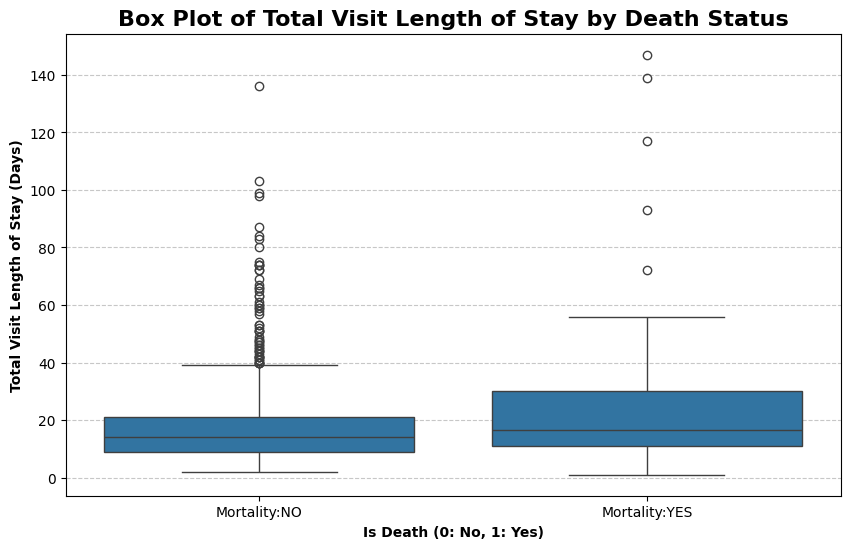

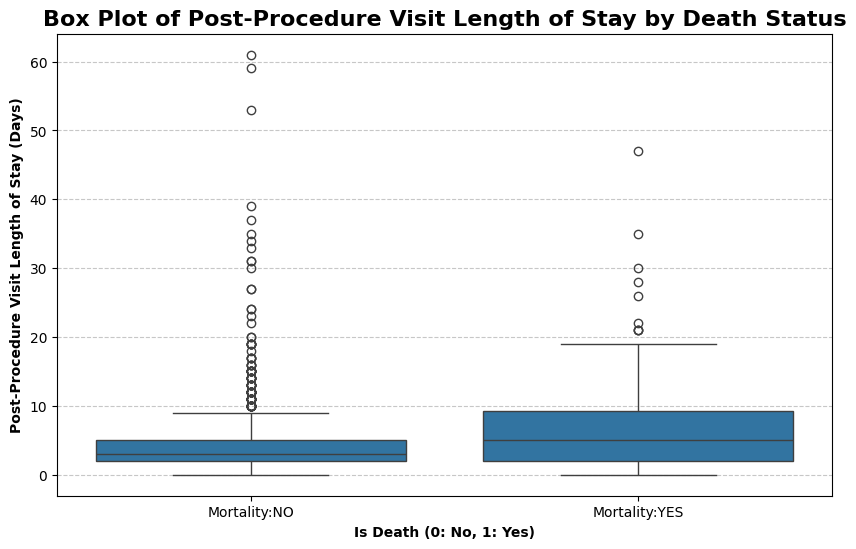

In [ ]:
df_filtered_for_plot = df[ (df['is_death'] == 1) & (df['days_proc_to_death'] >= 0) | (df['is_death'] == 0) ]
plot_los_comparison_single(
    dataframe=df_filtered_for_plot,
    los_column_name='total_visit_los',
    plot_title='Box Plot of Total Visit Length of Stay by Death Status',
    x_label='Mortality (0: No, 1: Yes)',
    y_label='Total Visit Length of Stay (Days)',
    xtick_labels=['Mortality:NO', 'Mortality:YES']
)
plot_los_comparison_single(
    dataframe=df_filtered_for_plot,
    los_column_name='post_procedure_visit_los',
    plot_title='Box Plot of Post-Procedure Visit Length of Stay by Death Status',
    x_label='Mortality (0: No, 1: Yes)',
    y_label='Post-Procedure Visit Length of Stay (Days)',
    xtick_labels=['Mortality:NO', 'Mortality:YES']
)

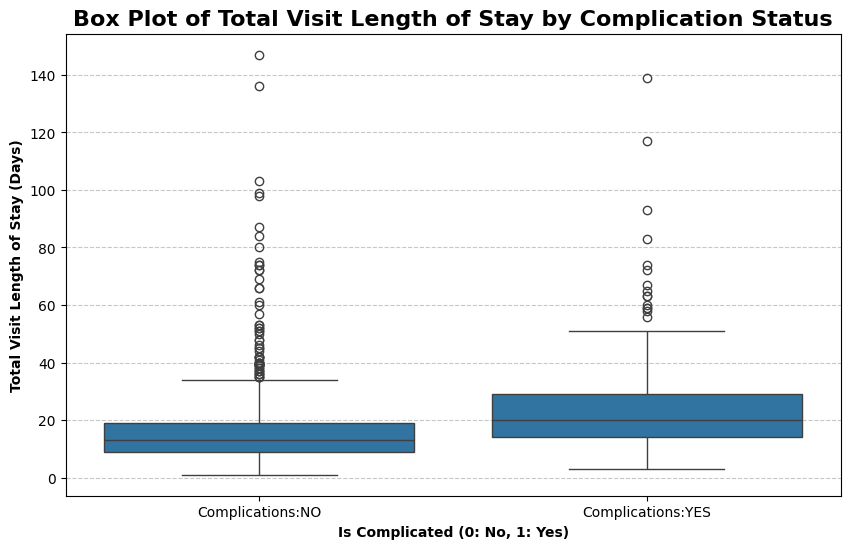

In [ ]:
plot_los_comparison_single(
    dataframe=df_filtered_for_plot,
    condition='is_complicated',
    los_column_name='total_visit_los',
    plot_title='Box Plot of Total Visit Length of Stay by Complication Status',
    x_label='Complication (0: No, 1: Yes)',
    y_label='Total Visit Length of Stay (Days)',
    xtick_labels=['Complications:NO', 'Complications:YES']
)

# Complicatiopns

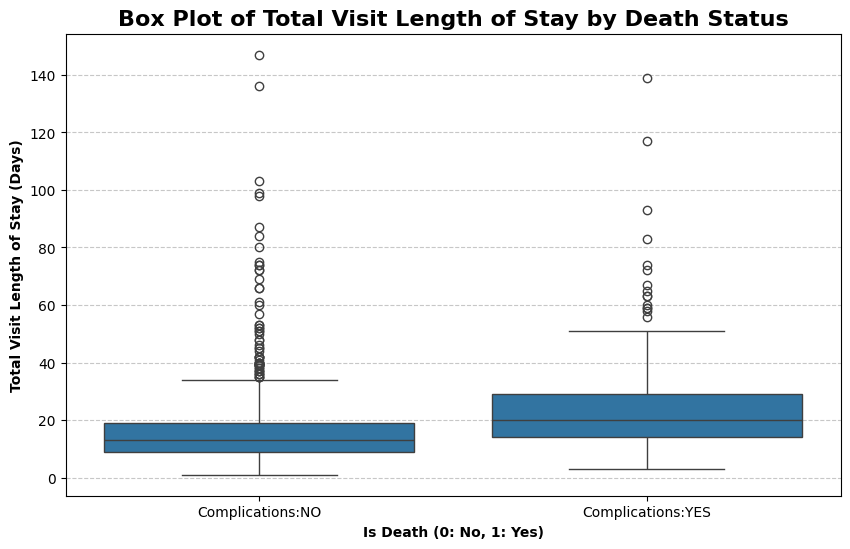

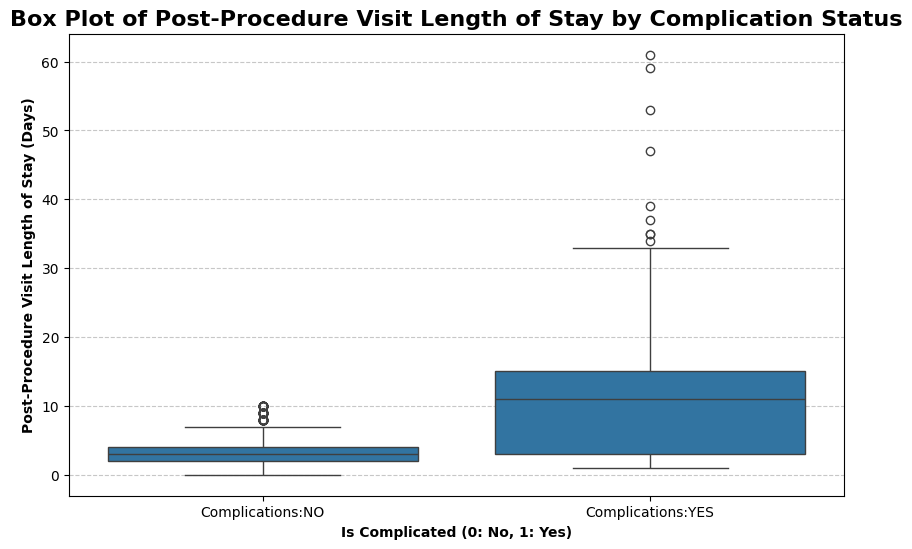

In [20]:
plot_los_comparison_single(
    dataframe=df_filtered_for_plot,
    condition='is_complicated',
    los_column_name='total_visit_los',
    plot_title='Box Plot of Total Visit Length of Stay by Death Status',
    x_label='Is Death (0: No, 1: Yes)',
    y_label='Total Visit Length of Stay (Days)',
    xtick_labels=['Complications:NO', 'Complications:YES']
)
plot_los_comparison_single(
    dataframe=df_filtered_for_plot,
    condition='is_complicated',
    los_column_name='post_procedure_visit_los',
    plot_title='Box Plot of Post-Procedure Visit Length of Stay by Complication Status',
    x_label='Is Complicated (0: No, 1: Yes)',
    y_label='Post-Procedure Visit Length of Stay (Days)',
    xtick_labels=['Complications:NO', 'Complications:YES']
)   

# Readmission
